# Logistics

* If you feel lost while working on this notebook (in class or outside or class), don't hesitate to post questions here: https://piazza.com/class/jrzeap5kpirw

# Description of the dataset

The file "Bertrand-physiodata.csv" was captured using the Empatica E4 wristband when Bertrand was teaching a class last Fall. The E4 collects information about a person's heart rate, electrodermal actibity, movements and temperature:

![title](https://support.empatica.com/hc/article_attachments/360000797783/e4_specs.jpg)

the csv file contains the following columns:
* **tags**: users can tag events by pressing a button on the wristband
* **real time**: time of the data collection
* **unix time**: number of seconds since 00:00:00 Thursday, 1 January 1970
* **BVP**: Blood volume pressure (used to compute HR data)
* **HR**: Heart rate data
* **EDA**: Electrodermal activity (i.e., physiological arousal)
* **TEMP**: temperature of the skin
* **ACC_x**: accelerometer data on the x axis
* **ACC_y**: accelerometer data on the y axis
* **ACC_z**: accelerometer data on the z axis

Today we are going to explore Bertrand's physiological response to teaching! :) more specifically, we are going to explore the relationship between heart rate and electrodermal activity. 

# Panda Review

Concepts: 
* head, tail, info, values
* zip, dict, pd.DataFrame
* df.columns
* read_csv, delimiter, header, index



In [1]:
# 1) import the pandas library as pd
import pandas as pd

In [2]:
# 2) import the csv file into a variable called df
df = pd.read_csv('Bertrand-physiodata.csv')


In [3]:
# 3) print the column names, just to make 
# sure that it matches what we have above
print(df.columns)

Index(['tags', 'real time', 'unix time', 'BVP', 'HR', 'EDA', 'TEMP', 'ACC_x',
       'ACC_y', 'ACC_z'],
      dtype='object')


In [4]:
# 4) use the head() function to check your data
df.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
0,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,0.0,33.31,-50.0,7.0,28.0
1,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-41.0,6.0,28.0
3,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-40.0,7.0,25.0


In [5]:
# 5) use the tail() function on your dataframe. How many rows do you have?
df.tail()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
333871,2.0,9/11/18 09:55,1.536674e+09,-2.74,NaN,NaN,NaN,NaN,NaN,NaN
333872,2.0,9/11/18 09:55,1.536674e+09,-2.11,NaN,NaN,NaN,-43.0,15.0,44.0
333873,2.0,9/11/18 09:55,1.536674e+09,-1.64,NaN,NaN,NaN,NaN,NaN,NaN
333874,2.0,9/11/18 09:55,1.536674e+09,-1.48,NaN,NaN,NaN,-42.0,15.0,44.0
333875,NaN,NaN,NaN,-1.66,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 6) use the info() function to inspect your data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333876 entries, 0 to 333875
Data columns (total 10 columns):
tags         333875 non-null float64
real time    333575 non-null object
unix time    333875 non-null float64
BVP          333575 non-null float64
HR           5203 non-null float64
EDA          20849 non-null float64
TEMP         20848 non-null float64
ACC_x        166788 non-null float64
ACC_y        166788 non-null float64
ACC_z        166788 non-null float64
dtypes: float64(9), object(1)
memory usage: 25.5+ MB


In [64]:
# 7) knowing that BVP is collected 64 times per second (i.e., 64Hz),
# what can you tell of the sampling frequency of the other measures?

# BVP
round((5203 / 333575)*64)

1

In [63]:
# EDA
round((20849 / 333575)*64)

4

# Plotting

Concepts: 
* plot, subplot, line plots, scatter, box plots, hist, ...
* mean, median, quantiles, STD, etc. 
* separate and summarize

In [8]:
# 8) make sure you're plotting your graphs inline
# Hint: https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Let's work on the heart rate (HR) data first

In this section we are going to produce various graphs to inspect Bertrand's heart rate data. 

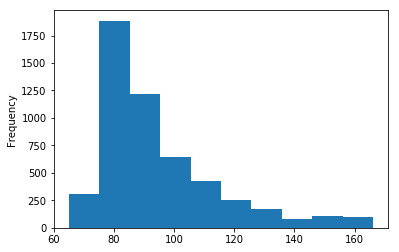

In [9]:
# 9) produce a histogram of the heart rate data; what can you say from it?
# plt.hist(pd['HR'])
df['HR'].plot(kind='hist')

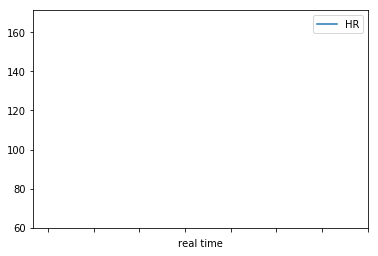

In [10]:
# 10) Try to plot the values over time (e.g., use the real time for the x axis):
df.plot(x='real time', y='HR', kind='line')

11) What happened? Come up with 2-3 reasons why this didn't work before you move on to the next question:
- reason 1: 
- reason 2: n/a values
- reason 3: 

In [11]:
df_clean = df[df.HR.notnull()]

After you've anwered the question above, feel free to look at this hint and try to fix your dataframe: https://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings/22553757

In [12]:
# 12) Fix your dataframe using the link above: 
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202 entries, 640 to 333804
Data columns (total 10 columns):
tags         5202 non-null float64
real time    5202 non-null object
unix time    5202 non-null float64
BVP          5202 non-null float64
HR           5202 non-null float64
EDA          5202 non-null float64
TEMP         5202 non-null float64
ACC_x        5202 non-null float64
ACC_y        5202 non-null float64
ACC_z        5202 non-null float64
dtypes: float64(9), object(1)
memory usage: 447.0+ KB


In [13]:
### Now let's look at the electrodermal activity data (EDA)
df_clean['EDA']

640       1.059777
704       1.125105
768       1.501703
832       1.204524
896       1.184028
960       1.171219
1024      1.164814
1088      1.154567
1152      1.136634
1217      1.116138
1281      1.118700
1345      1.104610
1409      1.096924
1473      1.077710
1537      0.994449
1601      1.026373
1665      0.925178
1729      0.980259
1793      0.975135
1857      1.098106
1921      0.578042
1985      1.078892
2049      0.854726
2113      1.332519
2177      1.080173
2241      2.571491
2305      1.277737
2369      0.904683
2433      1.185210
2497      1.174963
            ...   
331948    5.696836
332012    5.796750
332076    5.713489
332140    5.659689
332204    5.618699
332268    5.727579
332332    6.073013
332396    6.303583
332460    6.306145
332524    6.052518
332588    5.921862
332652    5.875747
332716    5.985909
332780    3.820292
332844    2.395465
332908    3.607239
332972    3.563483
333036    4.446054
333100    3.290642
333164    3.607239
333228    5.099957
333292    6.

In this section we are going to produce various graphs to inspect Bertrand's electrodermal data. 

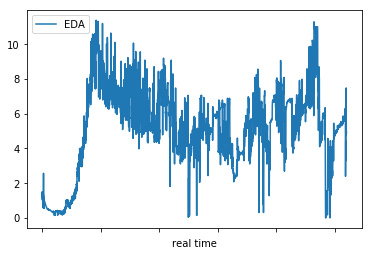

In [14]:
# 13) produce a line plot to visually inspect the EDA data
# Hint: make sure you filter the nonnull data
df_clean.plot(x='real time', y='EDA', kind='line')

Feel free to look at the following page to make sense of the units of the EDA data: 
* https://support.empatica.com/hc/en-us/articles/203621955-What-should-I-know-to-use-EDA-data-in-my-experiment-

In [15]:
df.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
0,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,0.0,33.31,-50.0,7.0,28.0
1,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-41.0,6.0,28.0
3,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,9/11/18 08:28,1.536669e+09,0.0,NaN,NaN,NaN,-40.0,7.0,25.0


In [16]:
print(df['real time'])

0         9/11/18 08:28
1         9/11/18 08:28
2         9/11/18 08:28
3         9/11/18 08:28
4         9/11/18 08:28
5         9/11/18 08:28
6         9/11/18 08:28
7         9/11/18 08:28
8         9/11/18 08:28
9         9/11/18 08:28
10        9/11/18 08:28
11        9/11/18 08:28
12        9/11/18 08:28
13        9/11/18 08:28
14        9/11/18 08:28
15        9/11/18 08:28
16        9/11/18 08:28
17        9/11/18 08:28
18        9/11/18 08:28
19        9/11/18 08:28
20        9/11/18 08:28
21        9/11/18 08:28
22        9/11/18 08:28
23        9/11/18 08:28
24        9/11/18 08:28
25        9/11/18 08:28
26        9/11/18 08:28
27        9/11/18 08:28
28        9/11/18 08:28
29        9/11/18 08:28
              ...      
333846    9/11/18 09:55
333847    9/11/18 09:55
333848    9/11/18 09:55
333849    9/11/18 09:55
333850    9/11/18 09:55
333851    9/11/18 09:55
333852    9/11/18 09:55
333853    9/11/18 09:55
333854    9/11/18 09:55
333855    9/11/18 09:55
333856    9/11/1

In [17]:
# 14) we don't have any labels on the x axis! 
# convert the 'real time' column into a real date time
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=3

time_format = '%d/%m/%y %H:%M'
df['real time'] = pd.to_datetime(df['real time'], format=time_format)

In [18]:
df.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
0,0.0,2018-11-09 08:28:00,1.536669e+09,0.0,NaN,0.0,33.31,-50.0,7.0,28.0
1,0.0,2018-11-09 08:28:00,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2018-11-09 08:28:00,1.536669e+09,0.0,NaN,NaN,NaN,-41.0,6.0,28.0
3,0.0,2018-11-09 08:28:00,1.536669e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,2018-11-09 08:28:00,1.536669e+09,0.0,NaN,NaN,NaN,-40.0,7.0,25.0


In [19]:
# 15) print the mean and median values of the EDA data; explain how they are different
print(df.EDA.mean())
print(df.EDA.median())

# the mean is the average value, while the median is the value at the middle of the dataset

5.18050743853421
5.320238


<function matplotlib.pyplot.show(*args, **kw)>

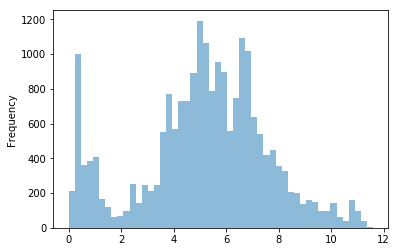

In [20]:
# 16) plot a histogram of the EDA values; does that confirm your interpretation above?
df.EDA.plot(kind='hist', bins=50, alpha=0.5, subplots=True)
plt.show

### Combining EDA and HR data on the same graph

In this section we are going to produce various graphs to inspect both the HR and EDA data.

In [21]:
# 17) filter both the EDA and HR values to keep the non-null rows:
# df['EDA'] = df['EDA'].dropna()
# df['HR'] = df['HR'].dropna()
# 
# df['EDA'] = df.EDA[(df.T != 0).any()]
# df['HR'] = df.HR[(df.T != 0).any()]

df = df[df['HR'].notnull()]
df = df[df['EDA'].notnull()]
df.head()

,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
640,0.0,2018-11-09 08:28:00,1.536669e+09,-79.05,72.00,1.059777,33.31,-13.0,65.0,-24.0
704,0.0,2018-11-09 08:28:00,1.536669e+09,218.11,71.50,1.125105,33.31,-35.0,-7.0,34.0
768,0.0,2018-11-09 08:28:00,1.536669e+09,-20.02,65.00,1.501703,33.31,-40.0,-12.0,34.0
832,0.0,2018-11-09 08:28:00,1.536669e+09,76.70,92.25,1.204524,33.31,-31.0,13.0,46.0
896,0.0,2018-11-09 08:28:00,1.536669e+09,71.85,87.60,1.184028,33.31,-38.0,8.0,51.0


<function matplotlib.pyplot.show(*args, **kw)>

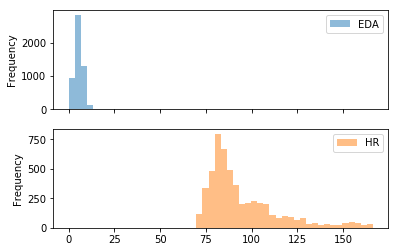

In [22]:
# 18) plot EDA and HR on two different graphs using subplots
# hint: https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
df[['EDA', 'HR']].plot(kind='hist', bins=50, alpha=0.5, subplots=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

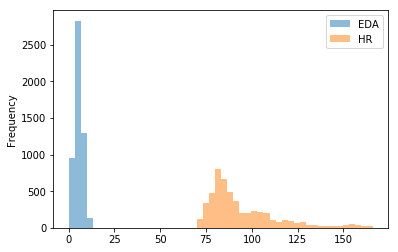

In [23]:
# 19) plot EDA and HR on the same graph; what went wrong?
df[['EDA', 'HR']].plot(kind='hist', bins=50, alpha=0.5, subplots=False)
plt.show

# because the EDA and HR are on different scales

In [24]:
# 20) normalize the HR and EDA columns using your favorite normalization strategy
# Hint: https://stackoverflow.com/questions/12525722/normalize-data-in-pandas
df['HR'] = (df['HR'] - df.HR.mean()) / (df.HR.max() - df.HR.min())
df['EDA'] = (df['EDA'] - df.EDA.mean()) / (df.EDA.max() - df.EDA.min())

<function matplotlib.pyplot.show(*args, **kw)>

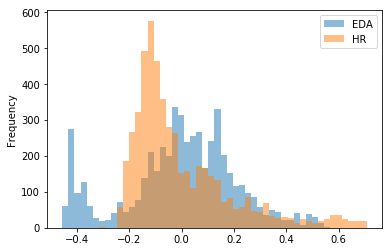

In [25]:
# 21) plot EDA and HR on the same graph; does the result look better?
df[['EDA', 'HR']].plot(kind='hist', bins=50, alpha=0.5, subplots=False)
plt.show
# yes!

In [26]:
# 22) what can you observe from the graph? Does there seem to be an agreement between HR and EDA?

To some extent, but it seems there are still NA (or 0) for HR.

**IN-CLASS DISCUSSION**: why do we normalize values? When do we want to normalize them?

# Time series

Concepts:
* indexing, slicing, datetimeIndex
* resampling, rolling mean
* method chaining and filtering
* plotting time series

In this section, we are going to work with some built-in function of pandas to work with time series. More specifically, we are going to downsample our data and use a rolling window to generate additional graphs.

In [56]:
# let's reimport our data to make sure it's clean
df = pd.read_csv('Bertrand-physiodata.csv')
filtered_df = df[df['EDA'].notnull() & df['EDA'].notnull()].copy()

# make sure that you are converting the real time column into a datetime
filtered_df['real time'] = pd.to_datetime(filtered_df['real time'], format='%d/%m/%y %H:%M')
filtered_df = filtered_df.set_index('real time')

filtered_df.head()


,tags,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
real time,,,,,,,,,
2018-11-09 09:55:00,2.0,1.536674e+09,0.69,84.75,4.948388,34.66,-42.0,15.0,45.0
2018-11-09 09:55:00,2.0,1.536674e+09,1.66,NaN,4.953512,34.66,-42.0,15.0,45.0
2018-11-09 09:55:00,2.0,1.536674e+09,-0.46,NaN,4.957355,34.66,-43.0,16.0,45.0
2018-11-09 09:55:00,2.0,1.536674e+09,0.11,NaN,4.959917,34.66,-42.0,15.0,45.0
2018-11-09 09:55:00,2.0,1.536674e+09,-5.22,84.93,4.976569,NaN,-42.0,16.0,46.0


In [58]:
len(df.index)

333876

### Down sampling

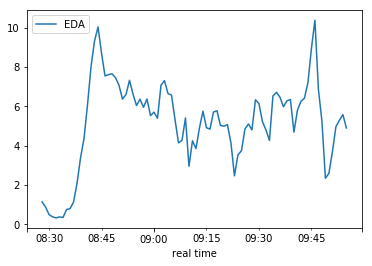

In [50]:
# 23) Use the instruction from datacamp to resample your data in 60 seconds windows and plot the result
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=7

df1 = filtered_df.resample('60s').mean()
df1.plot(y=['EDA'])
plt.show()


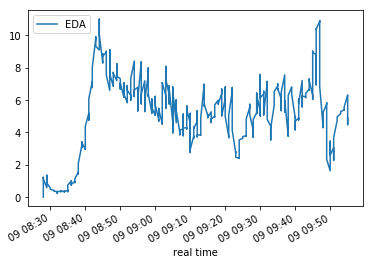

In [55]:
# 24) do the same thing, but this time using the rolling() function in a 60sec window
df2 = filtered_df.rolling('60s').mean()
df2.plot(y=['EDA'])
plt.show()

In [ ]:
# 25) What is the difference between rolling() and resample()? Why do the graphs look different?

The resampling is more smooth than the rolling

## Correlations

In this section we're going to keep exploring the relationship between heart rate data and electrodermal activity. We are going to do this visually (with a scatter plot first) and then using a statistical test (Pearson's correlation). 

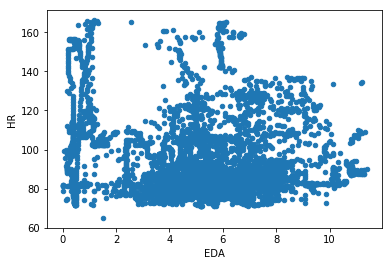

In [36]:
# 26) create a scatter plot between HR and EDA:
df.plot('EDA', 'HR', kind='scatter')

In [61]:
# 27) compute pearson's correlation between the HR and EDA data
df[['EDA', 'HR']].corr('pearson')


,EDA,HR
EDA,1.000000,-0.138619
HR,-0.138619,1.000000


In [ ]:
# 29) what can you conclude? Is there a linear relationship between HR and EDA data in this dataset?

There is a week negatively correlated relationship between HR and EDA